# Summary statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# see all columns at once with scrolling
pd.set_option('display.max_columns', None, 'display.max_rows', 100)

In [2]:
# Import data
owid = pd.read_csv('./data/1_owid/owid-covid-data.csv')
eu_response = pd.read_csv('./data/2_ecdc/country_response_measures.csv')

In [3]:
## Modity OWID data
# only keep rows in df that match to a country in eu_response
df = owid.loc[:,["location","date","reproduction_rate"]]
df = df[[x in eu_response["Country"].unique() for x in df["location"]]]

# Drop na's and set the start date as March 24 2020
df.dropna()
df = df[pd.to_datetime(df.date) >= pd.to_datetime('2020-03-24')]
df['t'] = pd.to_numeric((pd.to_datetime(df.date)-pd.to_datetime('2020-03-24')).dt.days, downcast='float')

In [4]:
## Modity eu_response data
dfsummary = eu_response[[x in df["location"].unique() for x in eu_response["Country"]]]
dfsummary = dfsummary[pd.to_datetime(dfsummary.date_start) >= pd.to_datetime('2020-03-24')]
dfsummary = dfsummary[['Country', 'Response_measure']]
dfsummary = dfsummary.drop_duplicates()

## Figure 1. The countries' responses to COVID-19

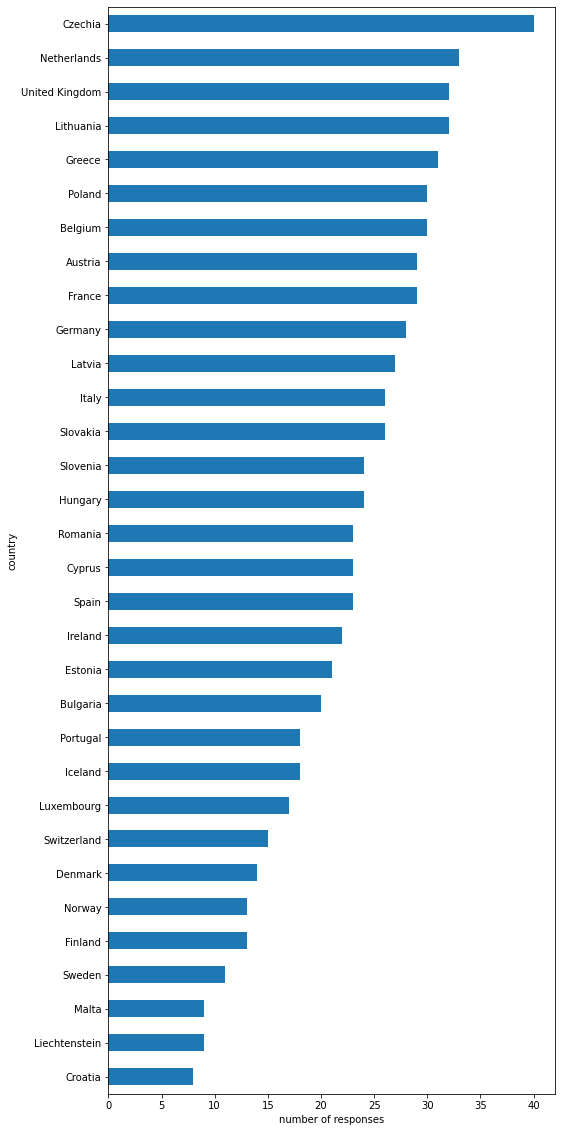

In [5]:
# Figure 1a. Number of responses for each country
ax1 = dfsummary['Country'].value_counts().plot(kind='barh',figsize=(8,20))
ax1.set_ylabel("country")
ax1.set_xlabel("number of responses")
ax1.invert_yaxis()

Text(0, 0.5, 'number of countries')

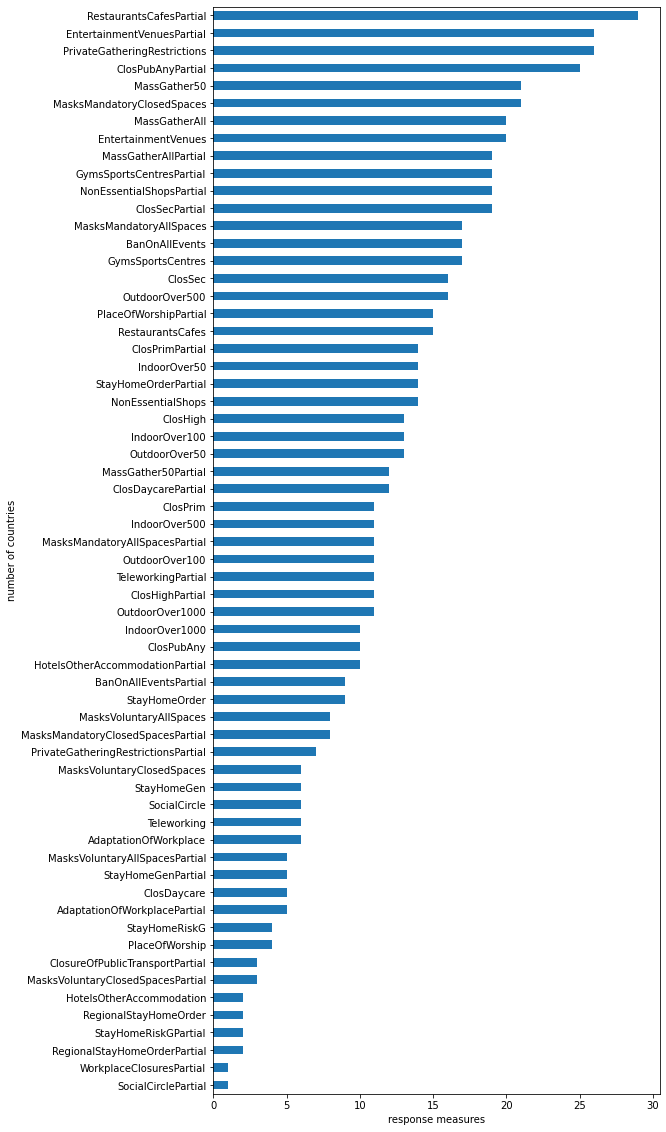

In [6]:
# Figure 1b. Number of countries for each response
ax2 = dfsummary['Response_measure'].value_counts().plot(kind='barh',figsize=(8,20))
ax2.invert_yaxis()
ax2.set_xlabel("response measures")
ax2.set_ylabel("number of countries")

# Figure 2. Reproduction rate by countries

Text(0.5, 0.98, '')

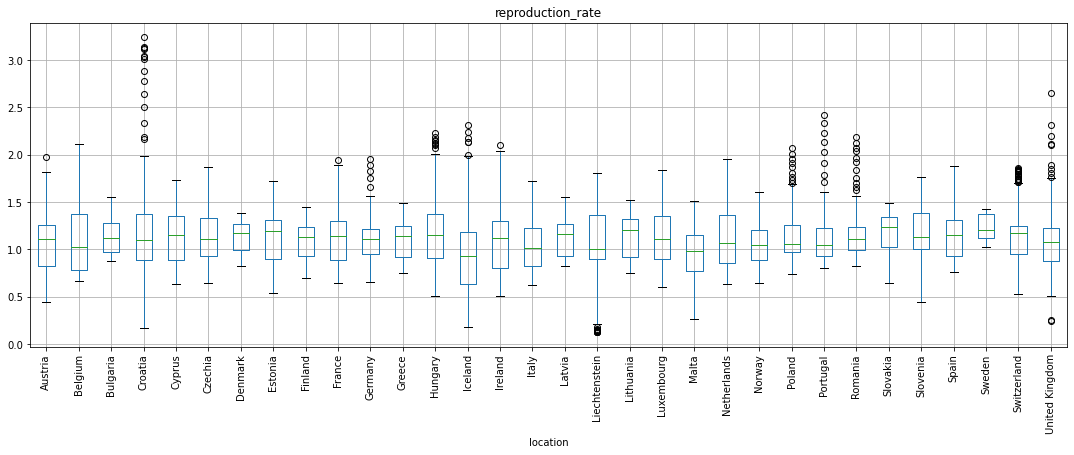

In [7]:
# Figure 2a. boxplot
bp_reproduction_rate = df.boxplot(column='reproduction_rate', by='location',figsize=(18,6),rot = 90)
plt.suptitle('')

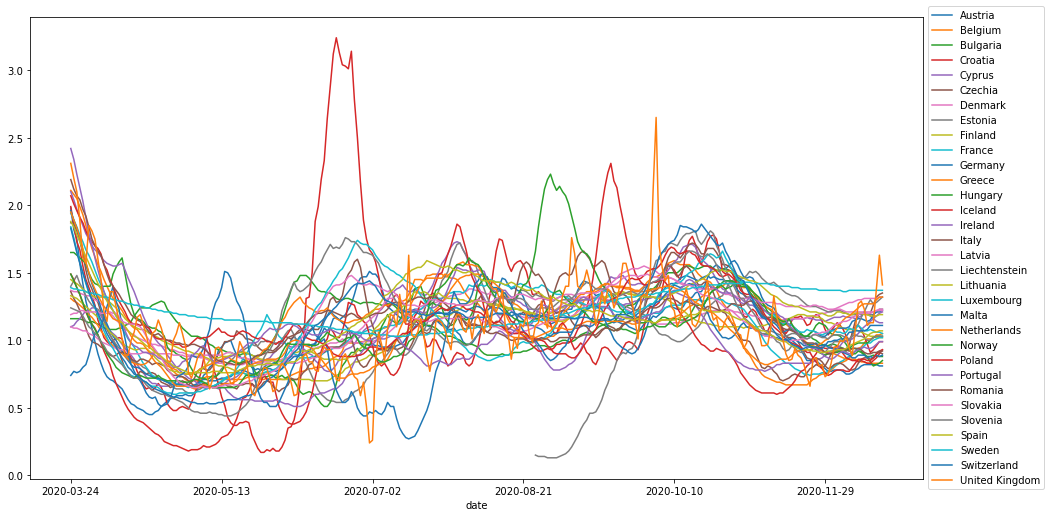

In [8]:
# Figure 2b. times series by country
df.pivot(index='date', columns='location', values='reproduction_rate').plot(figsize=(16,8.5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Additional Summary Statistics

In [9]:
by_country = dfsummary['Country'].value_counts()
print('Number of countries : ' + str(by_country.size))
print('Average number of responses: ' + str(by_country.mean()))
print('Standard deviation of number of responses: ' + str(by_country.std()))
print('Median number of responses: ' + str(by_country.median()))
print('Max number of responses: ' + str(by_country.max()))
print('Min number of responses: ' + str(by_country.min()))
print(by_country)

Number of countries : 32
Average number of responses: 22.4375
Standard deviation of number of responses: 8.115844717826418
Median number of responses: 23.0
Max number of responses: 40
Min number of responses: 8
Czechia           40
Netherlands       33
United Kingdom    32
Lithuania         32
Greece            31
Poland            30
Belgium           30
Austria           29
France            29
Germany           28
Latvia            27
Italy             26
Slovakia          26
Slovenia          24
Hungary           24
Romania           23
Cyprus            23
Spain             23
Ireland           22
Estonia           21
Bulgaria          20
Portugal          18
Iceland           18
Luxembourg        17
Switzerland       15
Denmark           14
Norway            13
Finland           13
Sweden            11
Malta              9
Liechtenstein      9
Croatia            8
Name: Country, dtype: int64


In [10]:
by_measure = dfsummary['Response_measure'].value_counts()
print(by_measure)

RestaurantsCafesPartial                29
EntertainmentVenuesPartial             26
PrivateGatheringRestrictions           26
ClosPubAnyPartial                      25
MassGather50                           21
MasksMandatoryClosedSpaces             21
MassGatherAll                          20
EntertainmentVenues                    20
MassGatherAllPartial                   19
GymsSportsCentresPartial               19
NonEssentialShopsPartial               19
ClosSecPartial                         19
MasksMandatoryAllSpaces                17
BanOnAllEvents                         17
GymsSportsCentres                      17
ClosSec                                16
OutdoorOver500                         16
PlaceOfWorshipPartial                  15
RestaurantsCafes                       15
ClosPrimPartial                        14
IndoorOver50                           14
StayHomeOrderPartial                   14
NonEssentialShops                      14
ClosHigh                          